# Predicting Borrower Payback with Lending Club Dataset
I will be creating a predictive model using Decision Trees and Random Forests to predict whether a borrower will pay back investors on the platform Lending Club. The goal is that, as an investor, you would be able to identify the best people to invest in (the people most likely to pay you back). 

I am completing this project as part of the online Udemy course "Python for Data Science and Machine Learning Bootcamp"

# Import Libraries and Retrieve Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

This data will come from 2007-2010 and has been provided by the course

In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


We're given this information about our dataset:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis (EDA)

I recently found out about a great EDA tool called pandas_profiling and am eager to try it out. 

In [6]:
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(loan_data)

Number of variables,14
Number of observations,9578
Total Missing (%),0.0%
Total size in memory,1.0 MiB
Average record size in memory,112.0 B
Numeric,11
Categorical,1
Boolean,2
Date,0
Text (Unique),0
Rejected,0


From the report, we can find a ton of useful information. I especially like the histograms of each variable as it helps give a better understand of the data and the distributions. We also can easily see that out testing variable, not.fully.paid, is not balanced. We may need to keep this in mind as we train and test our model.

Now I'm going to explore the data by looking at how the features interact with each other.

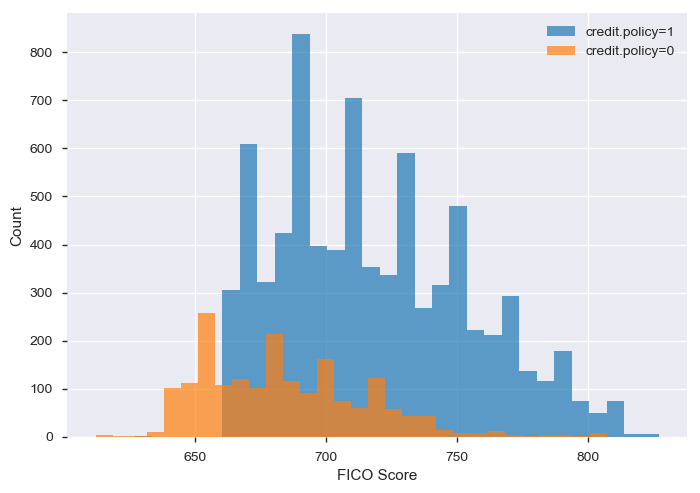

In [8]:
#FICO scores are supposed to be a good indicator of credit so let's look at that first.
#Let's look at the distribution of FICO scores for those approved to be borrowers or not.
_ = plt.hist(loan_data[loan_data['credit.policy']==1]['fico'], alpha = 0.7, bins = 30, label='credit.policy=1')
_ = plt.hist(loan_data[loan_data['credit.policy']==0]['fico'], alpha = 0.7, bins = 30, label='credit.policy=0')
_ = plt.xlabel('FICO Score')
_ = plt.ylabel('Count')
_ = plt.legend()

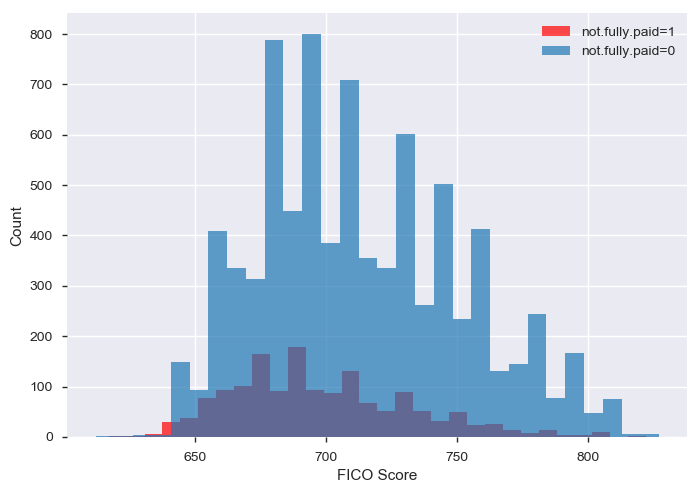

In [9]:
#Let's do it by whether they paid or not
_ = plt.hist(loan_data[loan_data['not.fully.paid']==1]['fico'], alpha = 0.7, bins = 30, label='not.fully.paid=1',color='r')
_ = plt.hist(loan_data[loan_data['not.fully.paid']==0]['fico'], alpha = 0.7, bins = 30, label='not.fully.paid=0')
_ = plt.xlabel('FICO Score')
_ = plt.ylabel('Count')
_ = plt.legend()

Although there is a difference in scale, the distribution is not so different between the FICO scores and whether they paid or not.

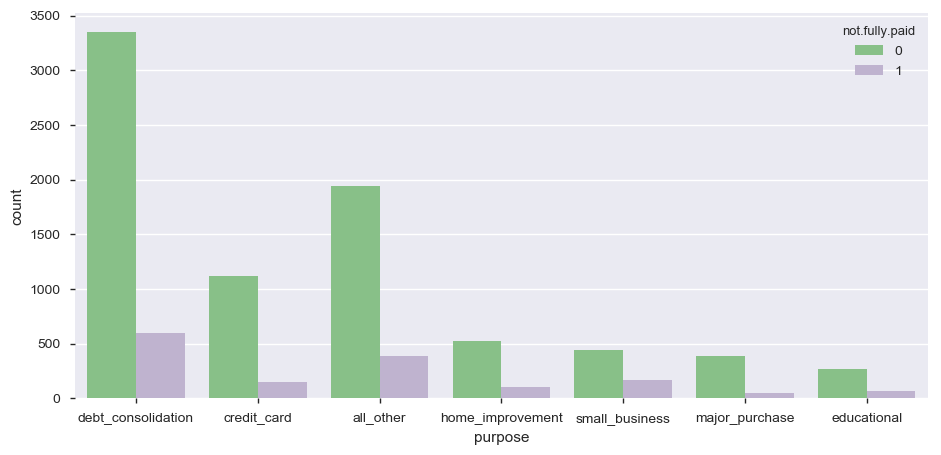

In [10]:
#Let's break it down by purpose and look at the counts for whether they paid or not
plt.figure(figsize=(11,5))
ax = sns.countplot(data=loan_data,x='purpose',hue='not.fully.paid',palette='Accent')


We see that debt consolidation is the number 1 reason for wanting a loan.

In [11]:
#I want to see the % of each as well to see what kind of inbalance we're dealing with and to see how unbalanced certain varibles are
x=pd.DataFrame(loan_data.groupby('not.fully.paid')['purpose'].value_counts())
x.rename(columns = {'purpose':'count'},inplace=True)
x=x.reset_index()
result = pd.crosstab(index=x['not.fully.paid'],columns=x['purpose'],values=x['count'],aggfunc='sum',normalize='columns')
result

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
not.fully.paid,,,,,,,
0,0.833977,0.884311,0.847612,0.798834,0.829889,0.887872,0.722132
1,0.166023,0.115689,0.152388,0.201166,0.170111,0.112128,0.277868


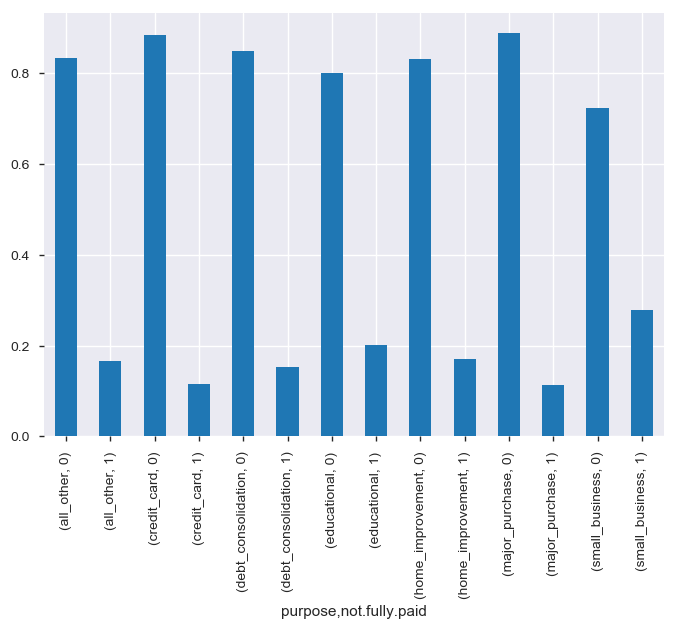

In [12]:
result.unstack().plot(kind='bar')

We see through this simple visualization that the small business loans had a slightly higher proportion of fully paid vs not, but, overall, we see that the distribution of not fully paid loans is pretty consistent across purposes.

C:\Users\Brandon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


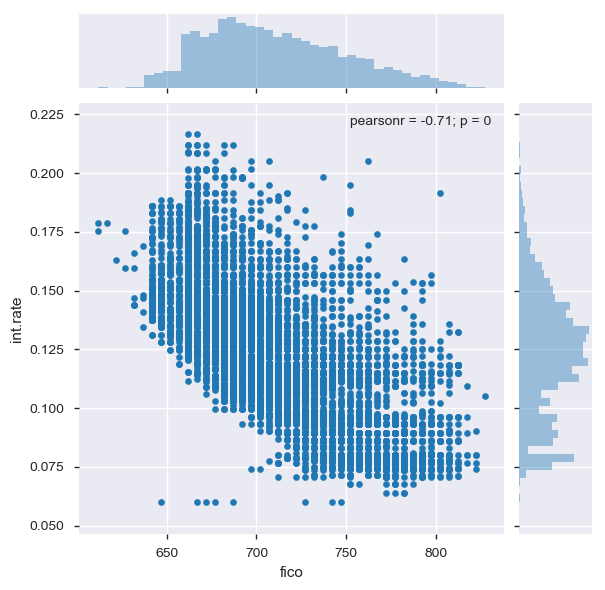

In [13]:
#I assume that FICO score and interest rate are somehow correlated so let's verify that.
g = sns.jointplot(data=loan_data,x='fico',y='int.rate', s = 20)
g = g.annotate(stats.pearsonr)

As we can see, there is a negative correlation between fico score and interest rates, as expected. Let's seperate this by whether they fully paid the loan or not and the credit policy they received. 

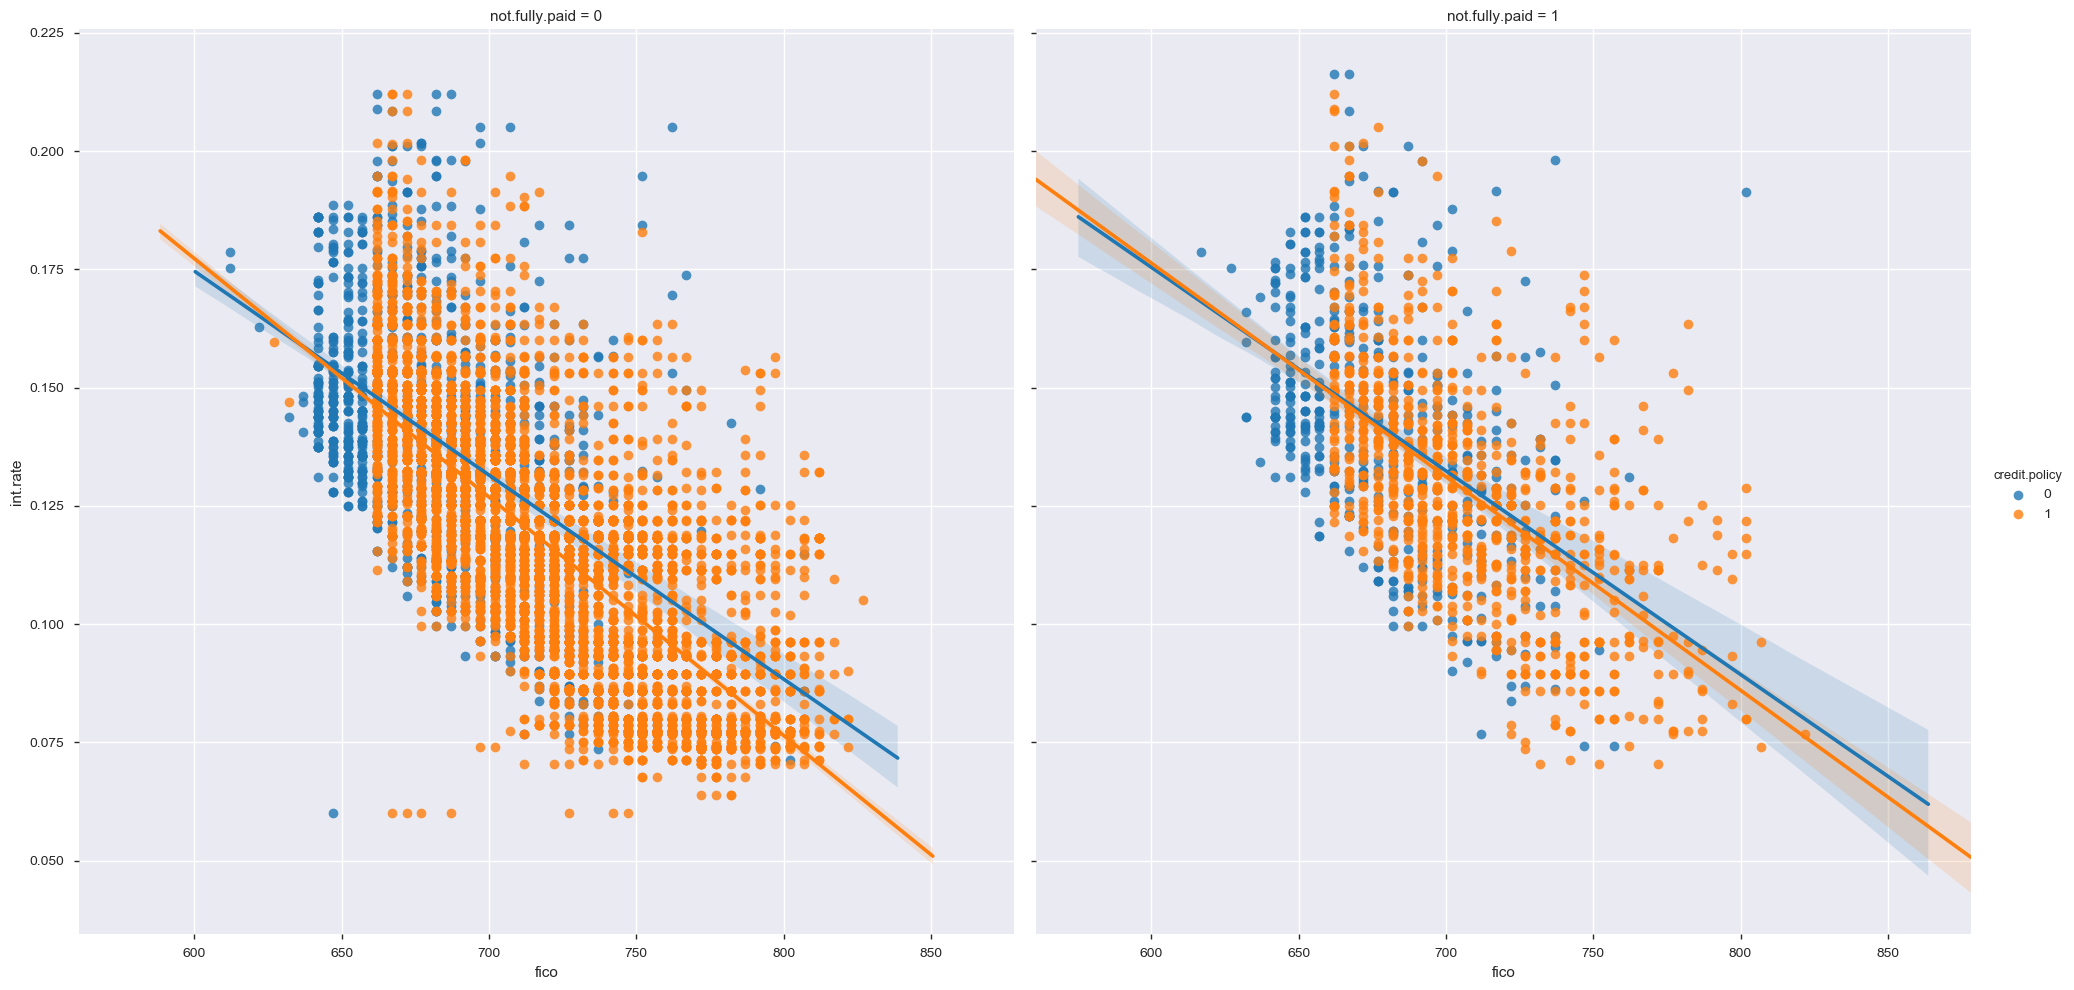

In [14]:
sns.lmplot(data=loan_data,x='fico',y='int.rate',col ='not.fully.paid',hue='credit.policy', height=10)

Its clear that, from the regression line, that those who had not met the credit policy tended to have a higher interest rate than their counterparts who did meet the policy when they paid for the loan. However, there's no real difference with those who did not fully pay. Regardless, there is a clear correlation between interest rate and fico score - the higher the fico score, the lower the interest rate you received (as expected).

# Building Our Model
## Preparing the Data

From our initial overview of the data, we see that we only have 1 categorical variable in our dataset. While it's not required in some decision trees/random forest algorithms, the sklearn toolkit we'll be using must take numerical values only. I'll be using one hot encoding (otherwise known as dummy variables) in order to represent this variable in the data.

In [15]:
cat_feats = ['purpose'] 

In [34]:
loan_data1 = pd.get_dummies(loan_data,columns=cat_feats,drop_first=True)
loan_data1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

In [18]:
X1 = loan_data1.drop('not.fully.paid',axis=1)
y1 = loan_data1['not.fully.paid']

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

# Decision Tree Model
We'll start with the decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next we'll evaluate the decision tree

In [21]:
dtpredictions1 = dtree1.predict(X1_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y1_test,dtpredictions1))
print(classification_report(y1_test,dtpredictions1))

[[1996  435]
 [ 345   98]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



# Random Forest Model
Now we'll use random forest to see if we can get a better model with it.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc1 = RandomForestClassifier(n_estimators=200)

In [26]:
rfc1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc1_pred=rfc1.predict(X1_test)

In [28]:
print(confusion_matrix(y1_test,rfc1_pred))
print(classification_report(y1_test,rfc1_pred))

[[2423    8]
 [ 433   10]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



It's apparent that the random forest makes less overall errors than the decision tree, but we see that the recall looks to be almost perfect for 0 and the opposite for 1. This could be due to the skewed data, but ultimately means that this model is great for avoiding False Negatives, which, in our case, is the opposite of what we want in a model. We want to be on the conservative end and make less false positives (meaning we think they will fully pay but they don't actually pay it all) than false negatives where we say they won't pay and they actually do.

Unlike other classifiers, because decision trees model discrete probabilities (the result is either a 0 or a 1), ROC curves and CAP curves will not be very beneficial to us in helping us understand the model. Therefore, the confusion matrix and classification report will be what we rely on for understanding our model.

# Decision Tree & Random Forest - Accounting for Inbalanced data

Because decision trees and random forest models are very sensitive to inbalanced datasets, I'm going to try and account for the data inbalance by applying weights to see if the model improves.

In [38]:
dtree2 = DecisionTreeClassifier(class_weight = "balanced")
dtree2.fit(X1_train,y1_train)
dtpredictions2 = dtree2.predict(X1_test)

In [39]:
print(confusion_matrix(y1_test,dtpredictions2))
print(classification_report(y1_test,dtpredictions2))

[[2046  385]
 [ 346   97]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2431
           1       0.20      0.22      0.21       443

   micro avg       0.75      0.75      0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874



In [29]:
rfc2 = RandomForestClassifier(n_estimators=200, class_weight = "balanced")
rfc2.fit(X1_train,y1_train)
rfc2_pred=rfc2.predict(X1_test)

In [30]:
print(confusion_matrix(y1_test,rfc2_pred))
print(classification_report(y1_test,rfc2_pred))

[[2426    5]
 [ 439    4]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.01      0.02       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.78      0.85      0.78      2874



It looks like the decision tree increased it's accuracy slightly by balancing the data, while the random forest model had reduced performance. 

If we had to choose one of these models for application, we would choose the decision tree model due to less type 1 errors (less false positivies). The random forest model performs only slightly better than our default of saying all users will not default and having a 19% fail rate for type 1 errors (the random forest has an 18% fail rate and the decision tree has a 16% fail rate). Although this is improvement from the default, other models would need to be tested to see if there is a model that would perform better than our decision tree.

Future improvements to this model could potentially be made by tuning the hyperparameters of these models to see if that improves the performance. In the future, I would like to see if K-fold cross validation utilizing sklearn's randomsearchCV and gridsearch could produce a better model by finding the most optimal hyperparameters. 

# Conclusion

I created decision tree and random forest models to try and predict loan defaults from this dataset. Although the random forest had a greater overall accuracy, the decision tree had less false positives, which is the error we want to minimize when considering who to loan money to - we want to minimize loaning to people who we think will pay back, but who end up not paying the money. The decision tree model could then be utilized on new datasets to determine if one should loan money or not to the user. 

In the future, I would like to improve upon the model by tuning hyperparameters for the decision tree as well as trying out other models on this dataset.